# Рубежный контроль №1 Юрова Евгения ИУ5-63Б 

# Вариант 19, задача №3

**Задание:** Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

In [2]:
data = pd.read_csv('/Users/evgeniayurova/Desktop/ML/toy_dataset.csv', sep=",")

In [3]:
data.shape

(150000, 6)

In [4]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [5]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## Преобразование категориальных признаков в количественные

In [26]:
cat_enc = pd.DataFrame({'c1':data.Gender})
cat_enc

,c1
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
149995,Male
149996,Male
149997,Male
149998,Male


### Использование LabelEncoder

Данный тип кодирования является наиболее используемым, преобразование представляет собой уникальное значение категориального признака

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
cat_enc['c1'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [30]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [31]:
cat_enc_le

array([1, 1, 1, ..., 1, 1, 0])

In [32]:
np.unique(cat_enc_le)

array([0, 1])

In [33]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1])

array(['Female', 'Male'], dtype=object)

### Кодирование категорий наборами бинарных значений - one-hot encoding



Данный тип кодирования основывается на создании бинарных признаков, которые показывают принадлежность к уникальному значению

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [36]:
cat_enc.shape

(150000, 1)

In [37]:
cat_enc_ohe.shape

(150000, 2)

In [38]:
cat_enc_ohe

<150000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 150000 stored elements in Compressed Sparse Row format>

In [39]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])

In [40]:
cat_enc.head(10)

,c1
0,Male
1,Male
2,Male
3,Male
4,Male
5,Female
6,Female
7,Male
8,Male
9,Female


## Масштабирование данных

### Для масштабирования буду использовать MinMax подход

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [46]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Income']])

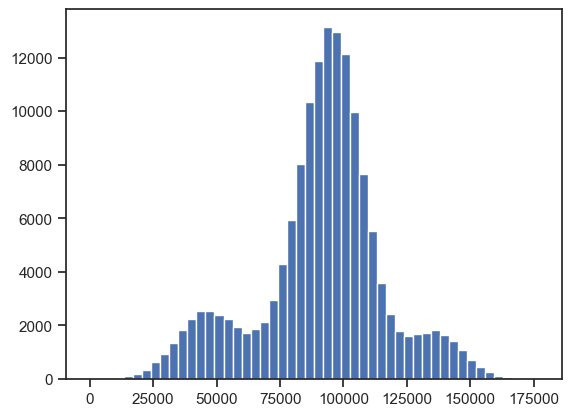

In [47]:
plt.hist(data['Income'], 50)
plt.show()

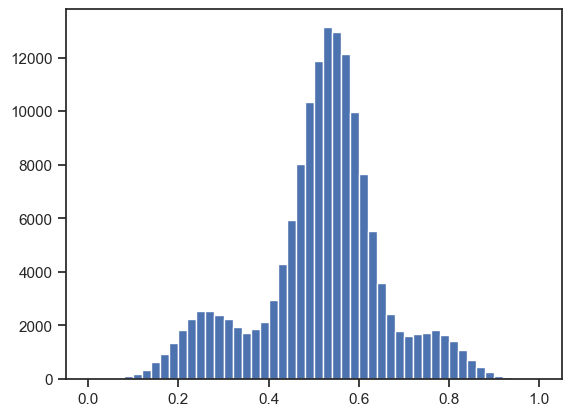

In [48]:
plt.hist(sc1_data, 50)
plt.show()

## График "Ящик с усами"

<AxesSubplot:xlabel='Income'>

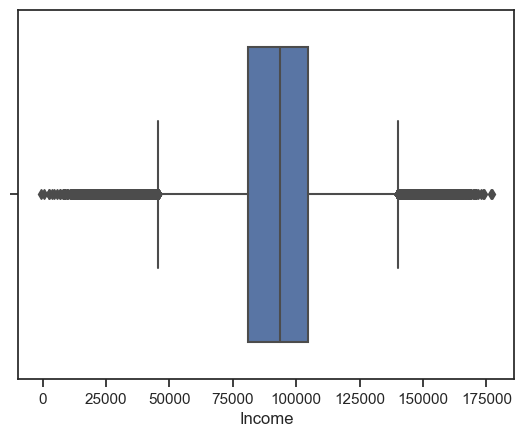

In [50]:
sns.boxplot(x=data['Income'])